In [1]:
# DEscription: This program uses an Artifical recurrent neural network called Long Term Memory(LSTM)
#to predict the closing stock price of a corporation(Apple Inc.) using the past 60 day stock price.

In [2]:
#import libraries
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense, LSTM
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")

In [3]:
df = pd.read_csv('HDFC.csv')

In [4]:
# dataframe
# show the data
df

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2000-01-03,HDFC,EQ,271.75,293.50,293.50,293.50,293.50,293.50,293.50,22744,6.675364e+11,NaN,NaN,NaN
1,2000-01-04,HDFC,EQ,293.50,317.00,317.00,297.00,304.00,304.05,303.62,255251,7.749972e+12,NaN,NaN,NaN
2,2000-01-05,HDFC,EQ,304.05,290.00,303.90,285.00,295.00,292.80,294.53,269087,7.925368e+12,NaN,NaN,NaN
3,2000-01-06,HDFC,EQ,292.80,301.00,314.00,295.00,296.00,296.45,300.14,305916,9.181669e+12,NaN,NaN,NaN
4,2000-01-07,HDFC,EQ,296.45,290.00,296.35,281.00,287.10,286.55,288.80,197039,5.690480e+12,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5301,2021-04-26,HDFC,EQ,2497.35,2500.00,2534.10,2483.20,2502.00,2509.80,2508.07,3916088,9.821805e+14,121028.0,2440395.0,0.6232
5302,2021-04-27,HDFC,EQ,2509.80,2494.15,2526.80,2486.25,2514.00,2518.40,2509.18,2040799,5.120730e+14,102250.0,1040749.0,0.5100
5303,2021-04-28,HDFC,EQ,2518.40,2516.10,2609.00,2508.30,2575.00,2577.00,2574.21,3407461,8.771527e+14,117425.0,1815110.0,0.5327
5304,2021-04-29,HDFC,EQ,2577.00,2590.90,2628.00,2533.00,2539.70,2538.85,2569.65,3005468,7.722995e+14,132826.0,1472924.0,0.4901


In [5]:
#Get the number of rows and columns in the data set
df.shape

(5306, 15)

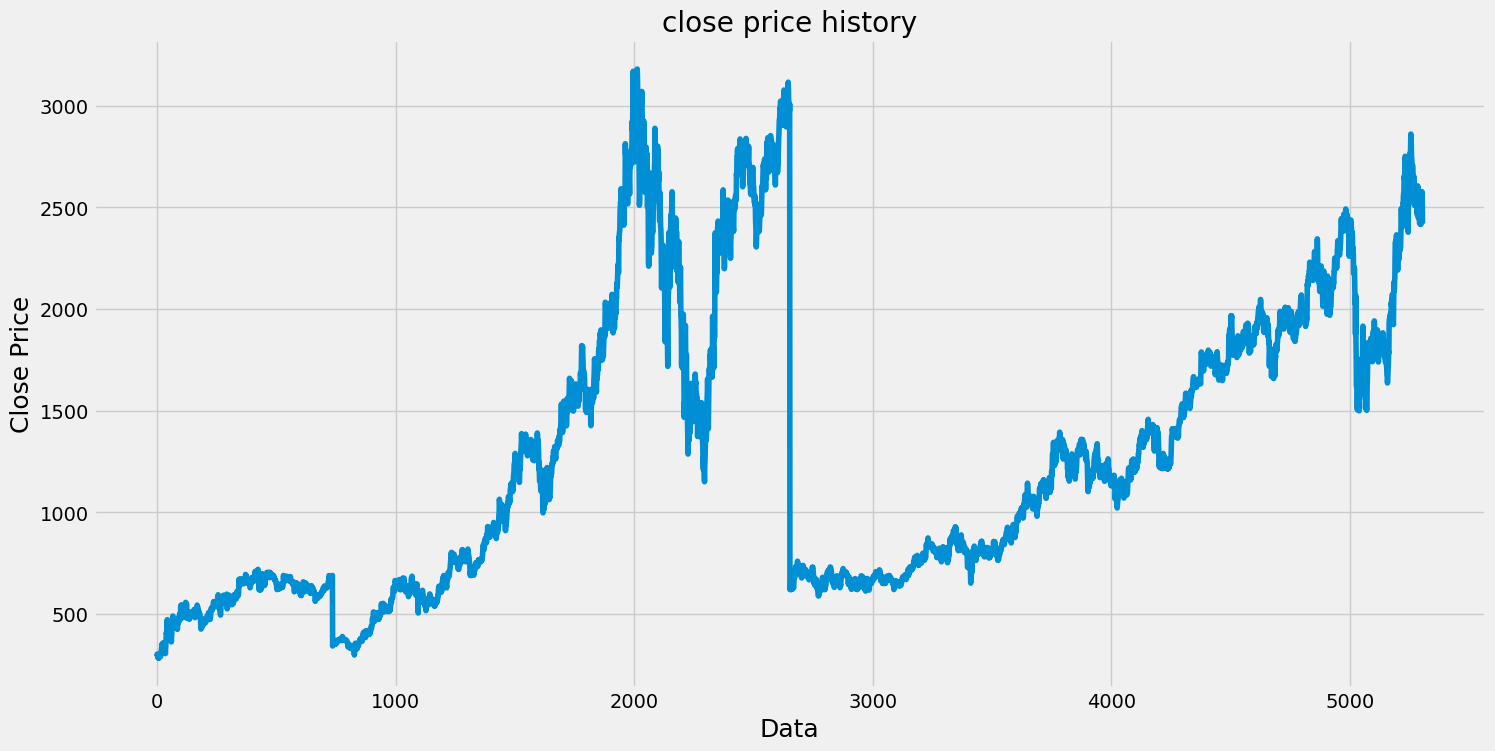

In [6]:
#visualize the closing price history
plt.figure(figsize=(16,8))
plt.title('close price history')
plt.plot(df['Close'])
plt.xlabel('Data',fontsize=18)
plt.ylabel('Close Price',fontsize=18)
plt.show()

In [7]:
#create new data frame with only clossing price
data= df.filter(['Close'])
#convert the dataframe to numpy array
dataset = data.values
#Get the number of rows to train the model on
training_data_len = math.ceil(len(dataset)* .7)
training_data_len

3715

In [8]:
#scale the data
# why we scale the data?
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[0.00333184],
       [0.00697442],
       [0.00309015],
       ...,
       [0.79175155],
       [0.77857957],
       [0.73757898]])

In [9]:
#create tranning dataset
# create the scaled training data set
train_data = scaled_data[0:training_data_len,:]
# split the data into x_train and y_train data sets
x_train = []
y_train = []
for i in range(60,len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<=60:
        print(x_train)
        print(y_train)
        print()

[array([0.00333184, 0.00697442, 0.00309015, 0.00435038, 0.00093222,
       0.00115665, 0.        , 0.00060422, 0.        , 0.00093222,
       0.00633567, 0.00756137, 0.00738874, 0.00258951, 0.00542071,
       0.00317647, 0.00666367, 0.01130753, 0.01400062, 0.01714256,
       0.02302938, 0.02332286, 0.02004281, 0.02532542, 0.0247212 ,
       0.02301212, 0.01564064, 0.01260229, 0.02064703, 0.02599869,
       0.01683182, 0.01993923, 0.01911059, 0.01520906, 0.01218796,
       0.00763043, 0.01608949, 0.02342644, 0.03314574, 0.04345199,
       0.04068985, 0.05179022, 0.06378828, 0.06532472, 0.05512205,
       0.04431516, 0.04586887, 0.03996478, 0.03925698, 0.03374996,
       0.03894624, 0.04027552, 0.03948141, 0.04229534, 0.04467769,
       0.04350378, 0.04590339, 0.04611055, 0.04448779, 0.03330111])]
[0.027621448054414258]



In [10]:
#convert the x_train and y_train to numpy array
x_train, y_train= np.array(x_train), np.array(y_train)

In [11]:
#reshape the data
# to ensure that the input data has the correct shape and dimensions required by the model
x_train = np.reshape(x_train,(x_train.shape[0], x_train.shape[1],1))
x_train.shape

(3655, 60, 1)

In [12]:
#Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences= True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences= False))
model.add(Dense(25))
model.add(Dense(1))

In [13]:
# Compile the model
model.compile(optimizer = 'adam',loss = 'mean_squared_error')

In [ ]:
# Train the model
# fit is just another name  of train
model.fit(x_train, y_train, batch_size =5, epochs = 10)

Epoch 1/10
731/731 [==============================] - 35s 42ms/step - loss: 0.0028
Epoch 2/10
731/731 [==============================] - 30s 41ms/step - loss: 0.0014
Epoch 3/10
731/731 [==============================] - 30s 40ms/step - loss: 9.5272e-04
Epoch 4/10
731/731 [==============================] - 31s 43ms/step - loss: 8.2556e-04
Epoch 5/10
313/731 [===========>..................] - ETA: 17s - loss: 8.9445e-04

In [ ]:
# Create the testing data set
# Create a new array containing scaled values from index ----- to -----
test_data = scaled_data[training_data_len - 60: , :]
# create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i, 0])

In [ ]:
# Convert the data to a numpy array so that we can use the LSTM model
x_test = np.array(x_test)

In [ ]:
# Reshape the data
# beacause our data set is 2D and  LSTM model 3D shape
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [ ]:
#Get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)
predictions

In [ ]:
# Get the root mean squared error (RMSE)
rmse = np.sqrt( np.mean( predictions - y_test)**2 )
rmse

In [ ]:

# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
#print(valid)
valid['predictions'] = predictions
#print(valid)
#plt(valid)
plt.figure(figsize =(16,8))
plt.title('Model')
plt.xlabel('Data', fontsize=18)
plt.ylabel('Close_Price', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'predictions']])
plt.legend(['Train', 'Val', 'predictions'], loc='lower right')
plt.show()